#LAB 3 MODELOS DE MACHINE LEARNING - REGRESION LOGISTICA

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# CARGAMOS EL DATASET

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lalvarenga90/Dataset-para-AI/main/COVID-19%20Global%20Statistics%20Dataset.csv')
df.head()


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


# PREPARAMOS LOS DATOS

In [3]:
# Revisar nombres de columnas y elegir las relevantes
print(df.columns)

# Eliminar comas de los números y convertir a tipo numérico
data = df.replace({',': ''}, regex=True)
selected_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases']
df[selected_columns] = data[selected_columns].apply(pd.to_numeric)

# Seleccionar columnas relevantes para el modelo (esto es solo un ejemplo, ajusta según el dataset)
df = df[selected_columns]

# Manejo de valores nulos
df = df.dropna()

# Normalización o estandarización si es necesario
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Asumiendo que quieres predecir 'ActiveCases' (esto es solo un ejemplo)
X = data_scaled[:, :-1]
y = data_scaled[:, -1] > np.median(data_scaled[:, -1])  # Convertir a binario

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')


# ENTRENAMOS EL MODELO

In [4]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

#EVALUAMOS EL MODELO


In [13]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6785714285714286
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.88      0.76        32
        True       0.71      0.42      0.53        24

    accuracy                           0.68        56
   macro avg       0.69      0.65      0.64        56
weighted avg       0.69      0.68      0.66        56

Confusion Matrix:
[[28  4]
 [14 10]]


#VISUALIZAMOS LOS RESULTADOS

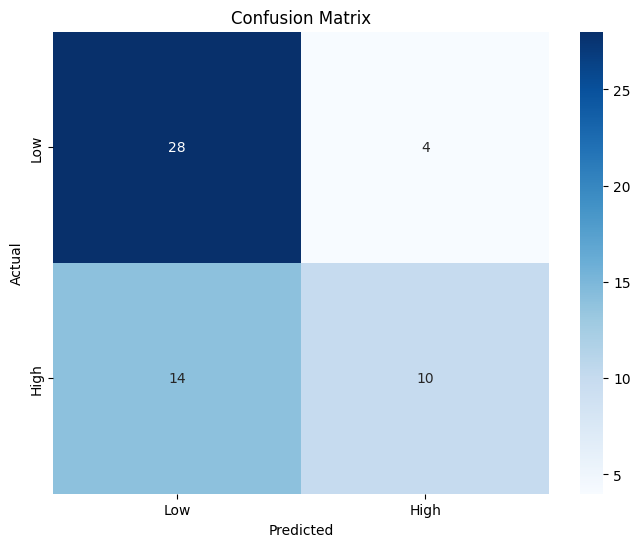

In [14]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()